In [209]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [75]:
#!pip install kneed
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors

In [169]:
def get_best_eps(data,k):
    
    nn = NearestNeighbors(k + 1)

    nn.fit(data[["x", "y"]])

    distances, neighbors = nn.kneighbors(data[["x", "y"]])
    
    # sort the distances
    distances = np.sort(distances[:, k], axis = 0)
    
    i = np.arange(len(distances))
    knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

    fig = plt.figure(figsize=(5, 5))
    knee.plot_knee()
    plt.xlabel("Points")
    plt.ylabel("Distance")

    return (distances[knee.knee])

# DBSCAN with Multiple Data Sets

Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.

## Dataset 1

In [2]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

d1.head()

,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


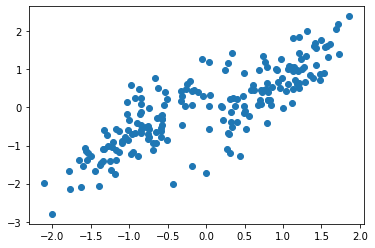

In [3]:
#Plottinig Data
plt.scatter(d1['x'], d1['y'])

In [461]:
def plot_Clusters(df,labels_, only_clustered = False):
    plt.clf()
    clusters = np.unique(labels_)
    colors = ['r','g','c','m','y','k','#222222','#22FFF2','#24AAA2','#22FF22','grey']
    for c in clusters:   
        if(only_clustered):
            if (c==-1):
                continue
        c_label = 'Noise' if (c==-1) else f'cluster {c}'
        plt.scatter(df[labels_==c]['x'], df[labels_==c]['y'],c=colors[c],label=c_label)
    plt.legend()

## DBSCAN

0.2506549303150166

<Figure size 360x360 with 0 Axes>

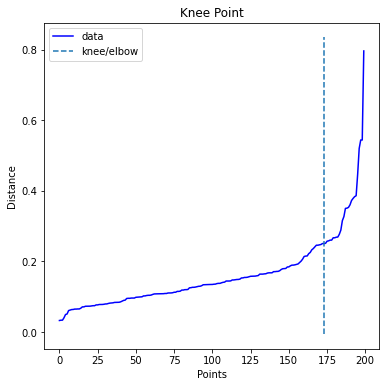

In [524]:
best_eps_d1 = get_best_eps(d1,2)
best_eps_d1

In [197]:
# dbscan and plot
clustering = DBSCAN(eps=best_eps_d1, min_samples=6).fit(d1)
labels_d1 = clustering.labels_
labels_d1

array([-1,  0,  0,  0,  0,  0,  1,  0, -1,  0,  1, -1,  0,  0, -1,  0,  0,
        3, -1,  1,  0, -1,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0, -1,  0,  0,  0, -1,  0,  0, -1,  3,
        2, -1,  3,  3,  3,  3, -1,  3,  3, -1,  3,  3,  3,  3,  3,  2,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  2,  3,  2,  3,  3,  3,  3,
        2,  3,  3,  3,  3,  2,  2,  2,  3, -1, -1,  3,  2,  3,  3,  3,  3,
        3,  2,  3,  3,  3,  3,  3,  2,  2,  3, -1,  3,  2, -1,  3, -1,  3,
        3,  3,  3, -1,  3,  2,  3,  3,  2, -1, -1, -1,  3,  3,  3,  3, -1,
        3, -1,  3,  3,  3,  3, -1,  3,  3,  3,  2,  3,  3], dtype=int64)

In [201]:
ss_d1 =silhouette_score(d1, labels_d1)
ss_d1

0.17181050253054309

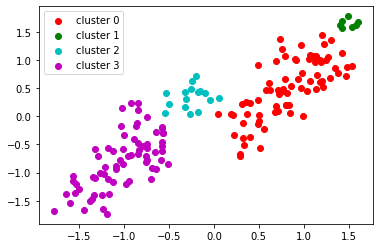

In [199]:
# grab only clustered data points
plot_Clusters(d1,labels_d1,True)

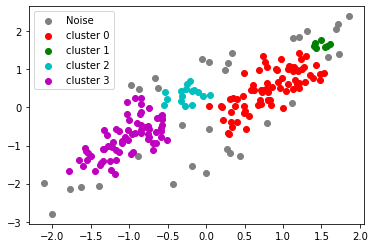

In [200]:
# overall 
plot_Clusters(d1,labels_d1)

## K-Means

In [115]:
def plot_elbow(d1,K_range=range(1, 10)): 
    distortions = []
    K = range(1, 10)

    for k in K:
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k).fit(d1)
        kmeanModel.fit(d1)
        distortions.append(kmeanModel.inertia_)

    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method using Inertia')
    plt.show()

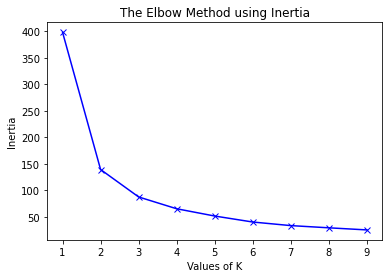

In [116]:
plot_elbow(d1)

In [117]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(d1)
kmeans.labels_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2,
       0, 0])

In [202]:
ss_d1_kmeans =silhouette_score(d1, kmeans.labels_)
ss_d1_kmeans

0.43992489383941363

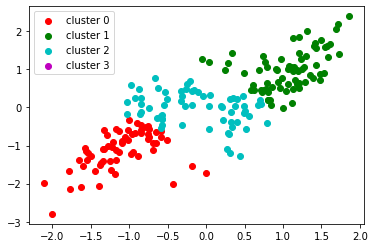

In [203]:
plot_Clusters(d1,kmeans.labels_,True)

## GMM

In [204]:
gm = GaussianMixture(n_components=3, random_state=0).fit(d1)
gm_labels = gm.predict(d1[["x","y"]])
gm_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2], dtype=int64)

0.33069758608185473


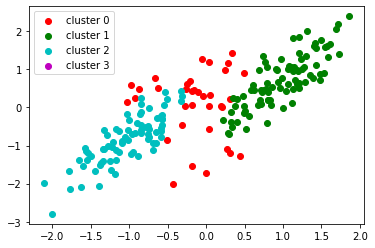

In [207]:
ss_d1_gmm =silhouette_score(d1, gm_labels)
print(ss_d1_gmm)
plot_Clusters(d1,gm_labels,True)

## Hierarchical

In [214]:
H_model = AgglomerativeClustering(n_clusters=3)
H_model = H_model.fit(d1)
H_labels = H_model.labels_
H_labels

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 1], dtype=int64)

In [217]:
ss_d1_H =silhouette_score(d1, H_labels)
print(ss_d1_H)

0.41567707625984956


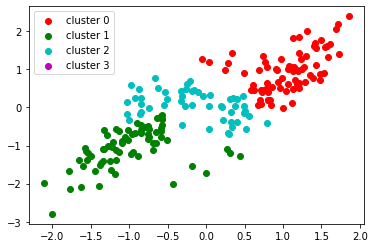

In [219]:
plot_Clusters(d1,H_labels,True)

## Dataset 2

In [220]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")
d2.head()

,x,y
0,1.578527,1.408111
1,1.748206,0.441915
2,1.523151,0.681521
3,1.318949,0.362971
4,0.977164,-0.373589


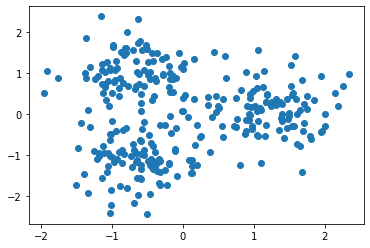

In [221]:
#plot data
plt.scatter(d2['x'], d2['y'])

## DBSCAN

0.28033050285198136

<Figure size 360x360 with 0 Axes>

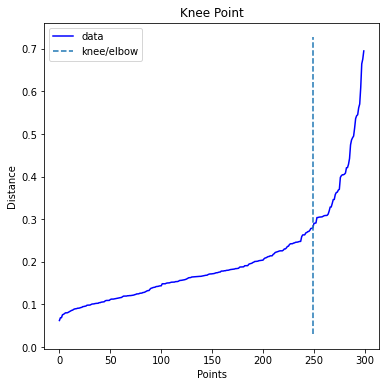

In [225]:
best_eps_d2 = get_best_eps(d2,3)
best_eps_d2

In [254]:
clustering = DBSCAN(eps=best_eps_d2, min_samples=6).fit(d2)
labels_d2 = clustering.labels_

In [255]:
ss_d2_dbscan =silhouette_score(d2, labels_d2)
ss_d2_dbscan

0.2844095313097745

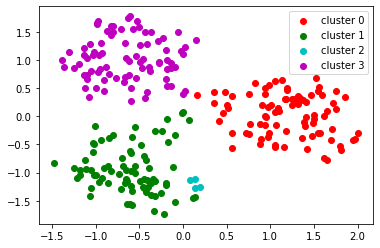

In [256]:
# grab only clustered data points
plot_Clusters(d2,labels_d2,True)

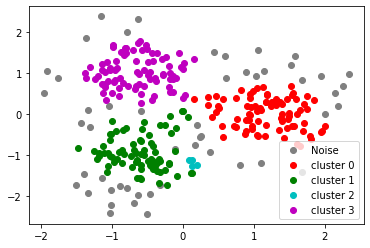

In [229]:
# overall
plot_Clustersf(d2,labels_d2)

## K-Means

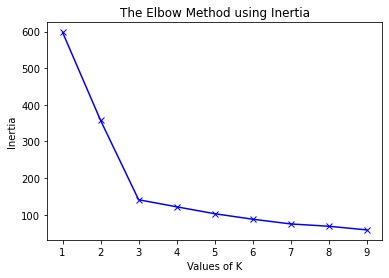

In [233]:
plot_elbow(d2)

In [237]:
kmeans_2 = KMeans(n_clusters=3, random_state=0).fit(d2)
kmeans_2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [238]:
ss_d2_kmeans = silhouette_score(d2, kmeans_2.labels_)
ss_d2_kmeans

0.5583157663135309

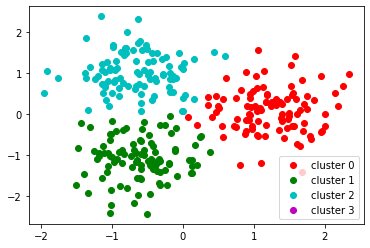

In [241]:
plot_Clusters(d2,kmeans_2.labels_,True)

## GMM

In [242]:
gm_2 = GaussianMixture(n_components=3, random_state=0).fit(d1)
gm_2_labels = gm_2.predict(d2[["x","y"]])
gm_2_labels

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

0.08562450093470678


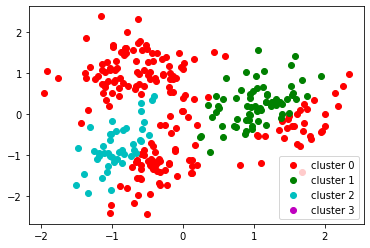

In [244]:
ss_d2_gmm =silhouette_score(d2, gm_2_labels)
print(ss_d2_gmm)
plot_Clusters(d2,gm_2_labels,True)

## Hierarchical

In [247]:
H_model2 = AgglomerativeClustering(n_clusters=3)
H_model2 = H_model2.fit(d2)
H_labels2 = H_model2.labels_
H_labels2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [248]:
ss_d2_H =silhouette_score(d2, H_labels2)
print(ss_d2_H)

0.5331004784160976


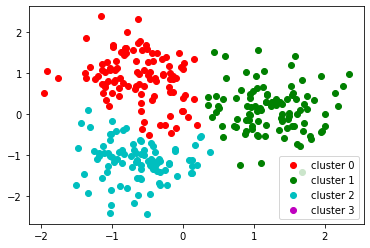

In [250]:
plot_Clusters(d2,H_labels2,True)

## Dataset 3

In [257]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")
d3.head()

,x,y
0,1.332228,0.178299
1,1.256056,0.146765
2,1.477661,0.155054
3,1.384840,0.022054
4,1.526956,0.267920


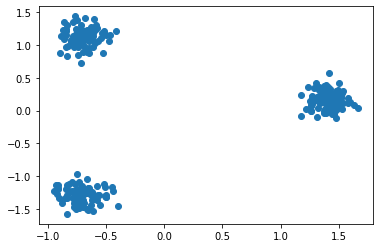

In [258]:
#plot data
plt.scatter(d3['x'], d3['y'])

0.07333624151172057

<Figure size 360x360 with 0 Axes>

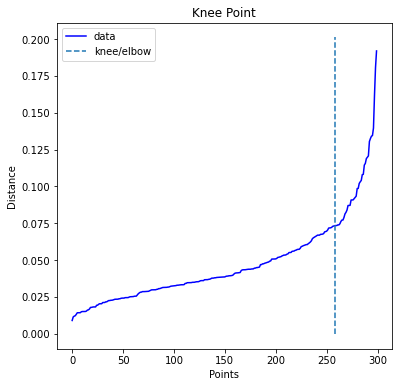

In [275]:
best_eps_d3 = get_best_eps(d3,3)
best_eps_d3

In [278]:
clustering = DBSCAN(eps=0.25, min_samples=6).fit(d3)
labels_d3 = clustering.labels_
labels_d3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

In [398]:
ss_d3_dbscan =silhouette_score(d3, labels_d3)
ss_d3_dbscan

0.913619050733588

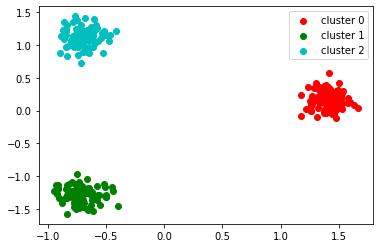

In [279]:
# grab only clustered data points
plot_Clusters(d3, labels_d3, only_clustered =True)

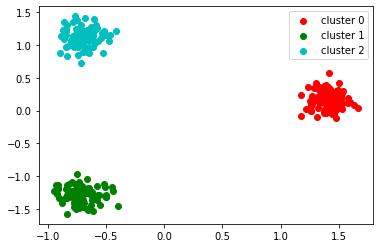

In [280]:
# overall
plot_Clusters(d3,labels_d3)

## K-Means

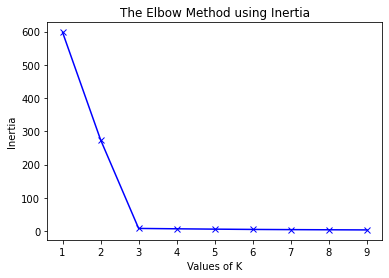

In [281]:
plot_elbow(d3)

In [283]:
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(d3)
kmeans_3.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [284]:
ss_d3_kmeans = silhouette_score(d3, kmeans_3.labels_)
ss_d3_kmeans

0.913619050733588

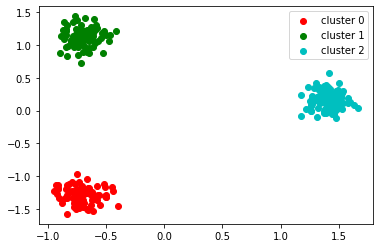

In [285]:
plot_Clusters(d3,kmeans_3.labels_,True)

## GMM

In [291]:
gm_3 = GaussianMixture(n_components=3, random_state=0).fit(d3)
gm_3_labels = gm_3.predict(d3[["x","y"]])
gm_3_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

0.913619050733588


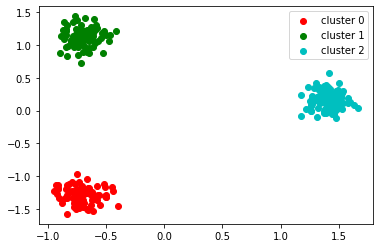

In [292]:
ss_d3_gmm =silhouette_score(d3, gm_3_labels)
print(ss_d3_gmm)
plot_Clusters(d3,gm_3_labels,True)

## Hierarchical

In [293]:
H_model3 = AgglomerativeClustering(n_clusters=3)
H_model3 = H_model3.fit(d3)
H_labels3 = H_model3.labels_
H_labels3

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [294]:
ss_d3_H =silhouette_score(d3, H_labels3)
print(ss_d3_H)

0.913619050733588


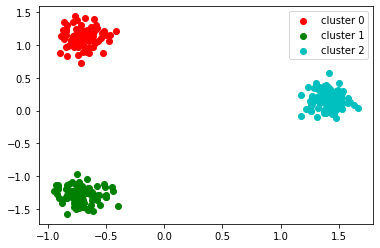

In [295]:
plot_Clusters(d3,H_labels3,True)

## Dataset 4

In [363]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")
d4.head()

,x,y
0,-0.006848,0.395527
1,0.314820,-0.289261
2,0.171705,1.078077
3,-1.203661,1.325926
4,-0.179379,-0.036615


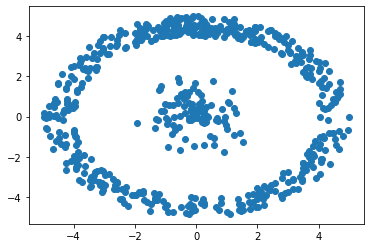

In [364]:
#plot data
plt.scatter(d4['x'], d4['y'])

0.7377323306873045

<Figure size 360x360 with 0 Axes>

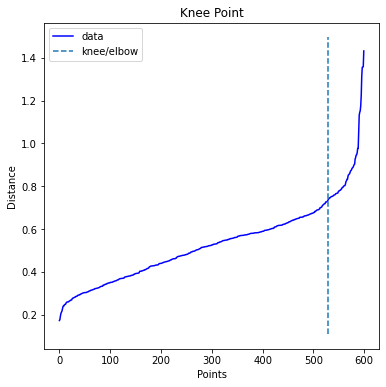

In [404]:
best_eps_d4 = get_best_eps(d4,12)
best_eps_d4

In [405]:
clustering = DBSCAN(eps=best_eps_d4, min_samples=6).fit(d4)
labels_d4 = clustering.labels_

In [406]:
ss_d4_dbscan =silhouette_score(d4, labels_d4)
ss_d4_dbscan

-0.03727820121544371

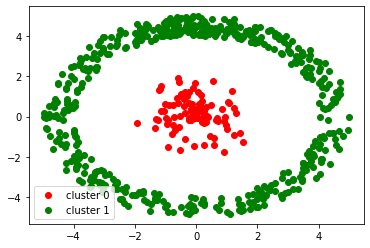

In [367]:
# grab only clustered data points
plot_Clusters(d4, labels_d4, only_clustered =True)

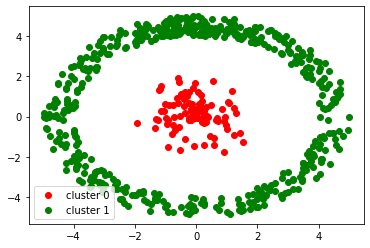

In [368]:
# overall
plot_Clusters(d4,labels_d4)

## K-Means

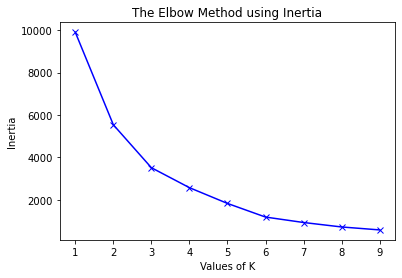

In [369]:
plot_elbow(d4)

In [370]:
kmeans_4 = KMeans(n_clusters=2, random_state=0).fit(d4)
kmeans_4.labels_

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [371]:
ss_d4_kmeans = silhouette_score(d4, kmeans_4.labels_)
ss_d4_kmeans

0.40672720405579144

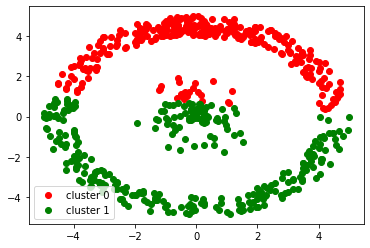

In [372]:
plot_Clusters(d4,kmeans_4.labels_,True)

## GMM

In [382]:
gm_4 = GaussianMixture(n_components=2, random_state=0).fit(d4)
gm_4_labels = gm_4.predict(d4[["x","y"]])
gm_4_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

0.311827952782311


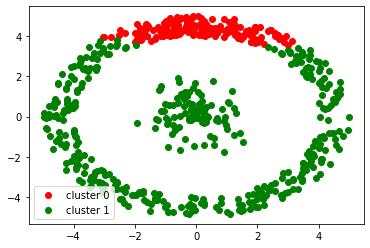

In [384]:
ss_d4_gmm =silhouette_score(d4, gm_4_labels)
print(ss_d4_gmm)
plot_Clusters(d4,gm_4_labels,True)

## Hierarchical

In [392]:
H_model4 = AgglomerativeClustering(n_clusters=2)
H_model4 = H_model4.fit(d4)
H_labels4 = H_model4.labels_

In [393]:
ss_d4_H =silhouette_score(d4, H_labels4)
print(ss_d4_H)

0.33842949599267796


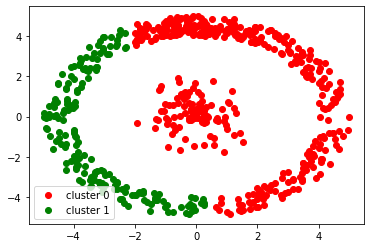

In [394]:
plot_Clusters(d4,H_labels4,True)

## Dataset 5

In [446]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")
d5.head()

,x,y
0,2.852449,-0.324568
1,2.346342,-0.729224
2,2.229033,-0.599340
3,2.458669,-0.385467
4,2.844177,-0.196813


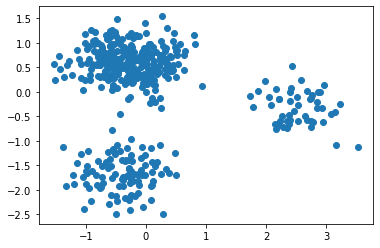

In [447]:
#plot data
plt.scatter(d5['x'], d5['y'])

0.31433856934817617

<Figure size 360x360 with 0 Axes>

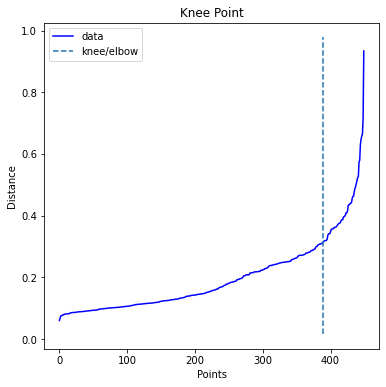

In [479]:
best_eps_d5 = get_best_eps(d5,8)
best_eps_d5

In [480]:
db5 = DBSCAN(eps = best_eps_d5, min_samples = 5).fit(d5) #  0.5 / 15
labels_d5 = db5.labels_ 

In [481]:
ss_d5_dbscan =silhouette_score(d5, labels_d5)
ss_d5_dbscan

0.6691787019926766

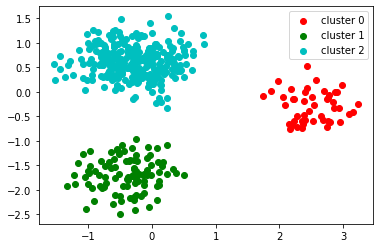

In [482]:
# grab only clustered data points
plot_Clusters(d5, labels_d5, only_clustered =True)

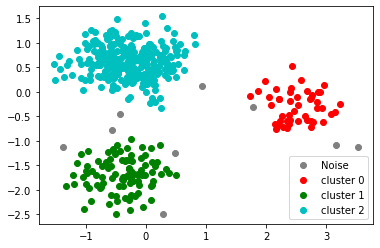

In [483]:
# Overall
plot_Clusters(d5, labels_d5)

## K-Means

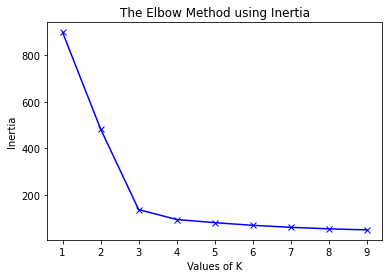

In [484]:
plot_elbow(d5)

In [486]:
kmeans_5 = KMeans(n_clusters=3, random_state=0).fit(d5)
kmeans_5.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [487]:
ss_d5_kmeans = silhouette_score(d5, kmeans_5.labels_)
ss_d5_kmeans

0.7043537508086658

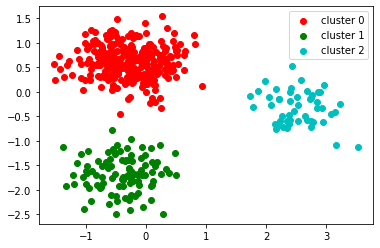

In [488]:
plot_Clusters(d5,kmeans_5.labels_,True)

## GMM

In [489]:
gm_5 = GaussianMixture(n_components=3, random_state=0).fit(d5)
gm_5_labels = gm_5.predict(d5[["x","y"]])
gm_5_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

0.7043537508086658


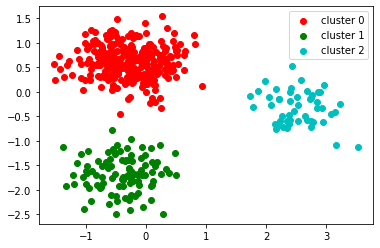

In [490]:
ss_d5_gmm =silhouette_score(d5, gm_5_labels)
print(ss_d5_gmm)
plot_Clusters(d5,gm_5_labels,True)

## Hierarchical

In [491]:
H_model5 = AgglomerativeClustering(n_clusters=)
H_model5 = H_model5.fit(d5)
H_labels5 = H_model5.labels_

In [492]:
ss_d5_H =silhouette_score(d5, H_labels5)
print(ss_d5_H)

0.7031189213721806


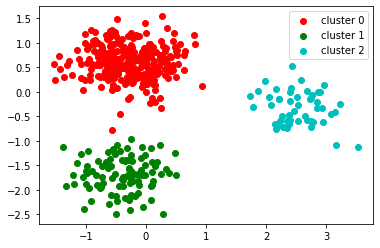

In [493]:
plot_Clusters(d5,H_labels5,True)

## Dataset 6

In [494]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")
d6.head()

,x,y
0,0.712520,0.653491
1,0.910914,0.068242
2,0.750752,0.526512
3,0.666605,0.584747
4,0.403062,0.956459


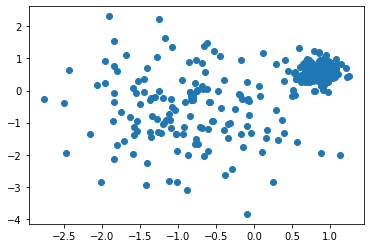

In [495]:
#plot data
plt.scatter(d6['x'], d6['y'])

0.3264556098876683

<Figure size 360x360 with 0 Axes>

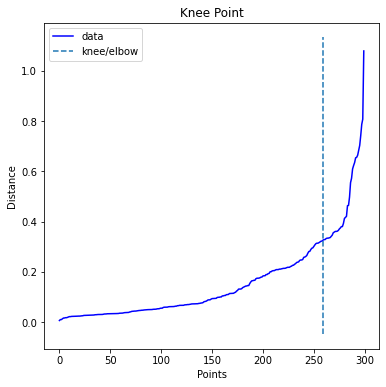

In [504]:
best_eps_d6 = get_best_eps(d6,2)
best_eps_d6

In [505]:
# we ask for 4 nearest, because the data point it self (distance = 0) is included
db6 = DBSCAN(eps = best_eps_d6, min_samples = 4).fit(d6)
labels_d6 = db6.labels_
labels_d6

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
       -1,  1,  1,  1, -1,  2,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  0,  0, -1,  1, -1, -1,  1,  1,  1,  0, -1,  1,  1,
        1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,
        1,  1,  0, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  2,  1,  1, -1,
       -1,  1,  1, -1,  2

In [508]:
ss_d6_dbscan =silhouette_score(d6, labels_d6)
ss_d6_dbscan

0.4681960065747541

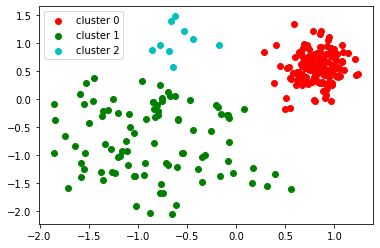

In [509]:
# grab only clustered data points
plot_Clusters(d6, labels_d6, only_clustered =True)

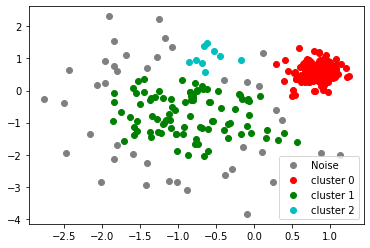

In [510]:
# overall 
plot_Clusters(d6, labels_d6)

## K-Means

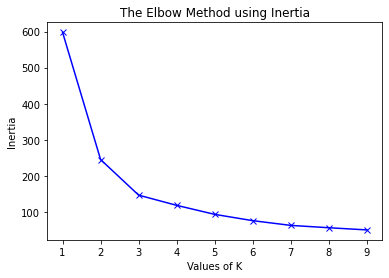

In [511]:
plot_elbow(d6)

In [513]:
kmeans_6 = KMeans(n_clusters=3, random_state=0).fit(d6)
kmeans_6.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1,
       0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 1,
       2, 0, 2, 2, 2, 1, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 2, 1, 0, 0, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0])

In [514]:
ss_d6_kmeans = silhouette_score(d6, kmeans_6.labels_)
ss_d6_kmeans

0.5861497443577425

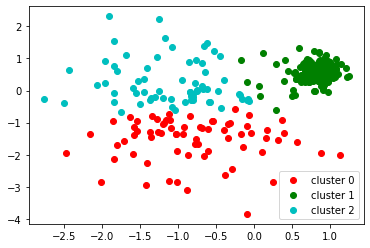

In [515]:
plot_Clusters(d6,kmeans_6.labels_,True)

## GMM

In [516]:
gm_6 = GaussianMixture(n_components=3, random_state=0).fit(d6)
gm_6_labels = gm_6.predict(d6[["x","y"]])
gm_6_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1,
       2, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0], d

0.5656303770456902


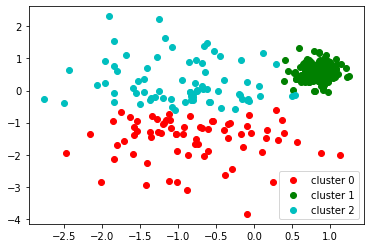

In [517]:
ss_d6_gmm =silhouette_score(d6, gm_6_labels)
print(ss_d6_gmm)
plot_Clusters(d6,gm_6_labels,True)

## Hierarchical

In [520]:
H_model6 = AgglomerativeClustering(n_clusters=3)
H_model6 = H_model6.fit(d6)
H_labels6 = H_model6.labels_

In [521]:
ss_d6_H =silhouette_score(d6, H_labels6)
print(ss_d6_H)

0.5228726587928135


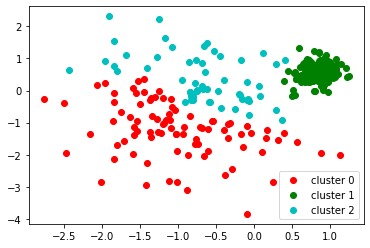

In [522]:
plot_Clusters(d6,H_labels6,True)